In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
cp /content/drive/MyDrive/Colab_Notebooks/ML_Work/Ihsan_DataAnalytics/monitor_mode.CSV .

In [5]:
ls

drive/  monitor_mode.CSV  sample_data/


In [6]:
df = pd.read_csv('monitor_mode.CSV')

In [7]:
df.head()

,Time,Conc(mg/m3),Flow(lpm),AT(C),RH(%),BP(mbar),Unnamed: 6
0,2021-09-20 10:40:32,0.078,2,36.7,38,948.8,NaN
1,2021-09-20 10:40:42,0.077,2,36.8,38,948.4,NaN
2,2021-09-20 10:40:52,0.077,2,36.7,38,949.1,NaN
3,2021-09-20 10:41:02,0.081,2,36.8,38,948.8,NaN
4,2021-09-20 10:41:12,0.075,2,36.8,38,948.5,NaN


In [8]:
df.columns

Index(['Time', 'Conc(mg/m3)', 'Flow(lpm)', 'AT(C)', 'RH(%)', 'BP(mbar)',
       'Unnamed: 6'],
      dtype='object')

In [9]:
type(df['Time'].iloc[0])

str

In [10]:
df['Time'] = pd.to_datetime(df['Time'])

In [12]:
time = df['Time'].iloc[0]
time.hour
#time.year
#time.day_name()

10

In [113]:
df['Time'].iloc[0]

Timestamp('2021-09-20 10:40:32')

In [13]:
df['Hour'] = df['Time'].apply(lambda time: time.hour)
df['Month'] = df['Time'].apply(lambda time: time.month)
df['Day of Week'] = df['Time'].apply(lambda time: time.dayofweek)

In [14]:
df.head()

,Time,Conc(mg/m3),Flow(lpm),AT(C),RH(%),BP(mbar),Unnamed: 6,Hour,Month,Day of Week
0,2021-09-20 10:40:32,0.078,2,36.7,38,948.8,NaN,10,9,0
1,2021-09-20 10:40:42,0.077,2,36.8,38,948.4,NaN,10,9,0
2,2021-09-20 10:40:52,0.077,2,36.7,38,949.1,NaN,10,9,0
3,2021-09-20 10:41:02,0.081,2,36.8,38,948.8,NaN,10,9,0
4,2021-09-20 10:41:12,0.075,2,36.8,38,948.5,NaN,10,9,0


In [16]:
dmap = {0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'}
df['Day of Week'] = df['Day of Week'].map(dmap)
df.head()

,Time,Conc(mg/m3),Flow(lpm),AT(C),RH(%),BP(mbar),Unnamed: 6,Hour,Month,Day of Week
0,2021-09-20 10:40:32,0.078,2,36.7,38,948.8,NaN,10,9,NaN
1,2021-09-20 10:40:42,0.077,2,36.8,38,948.4,NaN,10,9,NaN
2,2021-09-20 10:40:52,0.077,2,36.7,38,949.1,NaN,10,9,NaN
3,2021-09-20 10:41:02,0.081,2,36.8,38,948.8,NaN,10,9,NaN
4,2021-09-20 10:41:12,0.075,2,36.8,38,948.5,NaN,10,9,NaN


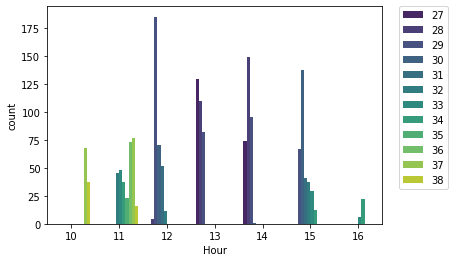

In [19]:
sns.countplot(x='Hour',data=df,hue='RH(%)', palette='viridis')


# To relocate the legend
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)


In [97]:
#dayHour = df.groupby(by = ['Hour', 'Flow(lpm)'])
#dayHour.head(20)

,Time,Conc(mg/m3),Flow(lpm),AT(C),RH(%),BP(mbar),Unnamed: 6,Hour,Month,Day of Week
0,2021-09-20 10:40:32,0.078,2,36.7,38,948.8,NaN,10,9,Mon
1,2021-09-20 10:40:42,0.077,2,36.8,38,948.4,NaN,10,9,Mon
2,2021-09-20 10:40:52,0.077,2,36.7,38,949.1,NaN,10,9,Mon
3,2021-09-20 10:41:02,0.081,2,36.8,38,948.8,NaN,10,9,Mon
4,2021-09-20 10:41:12,0.075,2,36.8,38,948.5,NaN,10,9,Mon
...,...,...,...,...,...,...,...,...,...,...
1724,2021-09-20 16:02:41,0.030,2,30.8,34,944.8,NaN,16,9,Mon
1725,2021-09-20 16:02:51,0.032,2,30.8,34,945.0,NaN,16,9,Mon
1726,2021-09-20 16:03:01,0.027,2,30.7,34,945.1,NaN,16,9,Mon
1727,2021-09-20 16:03:11,0.025,2,30.7,34,944.9,NaN,16,9,Mon


In [122]:
df.tail(10)

,Time,Conc(mg/m3),Flow(lpm),AT(C),RH(%),BP(mbar),Unnamed: 6,Hour,Month,Day of Week
1727,2021-09-20 16:03:11,0.025,2,30.7,34,944.9,NaN,16,9,Mon
1728,2021-09-20 16:03:21,0.026,2,30.6,34,944.9,NaN,16,9,Mon
1729,2021-09-20 16:03:31,0.032,2,30.6,34,944.7,NaN,16,9,Mon
1730,2021-09-20 16:03:41,0.029,2,30.5,34,945.0,NaN,16,9,Mon
1731,2021-09-20 16:03:51,0.029,2,30.5,34,944.8,NaN,16,9,Mon
1732,2021-09-20 16:04:01,0.031,2,30.5,34,944.9,NaN,16,9,Mon
1733,2021-09-20 16:04:21,0.029,2,30.4,34,944.8,NaN,16,9,Mon
1734,2021-09-20 16:04:31,0.030,2,30.4,34,945.1,NaN,16,9,Mon
1735,2021-09-20 16:04:41,0.028,2,30.3,34,945.1,NaN,16,9,Mon
1736,2021-09-20 16:04:51,0.029,2,30.2,34,944.8,NaN,16,9,Mon


In [20]:
df['Conc(mg/m3)'].mean()

0.05971329879101992

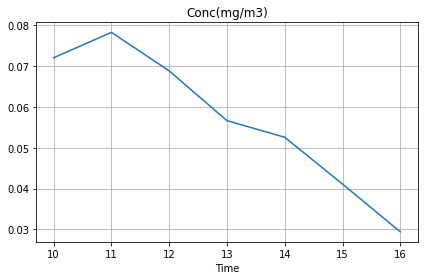

In [133]:
df.groupby([df["Time"].dt.hour])["Conc(mg/m3)"].mean().plot(grid=True)
plt.title('Conc(mg/m3)')

plt.tight_layout()


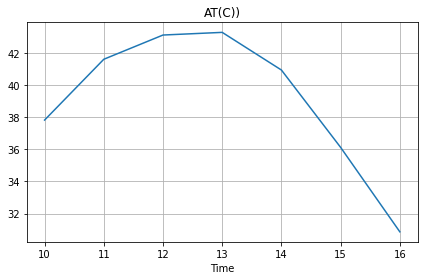

In [21]:
df.groupby([df["Time"].dt.hour])["AT(C)"].mean().plot(grid=True)
plt.title('AT(C))')

plt.tight_layout()


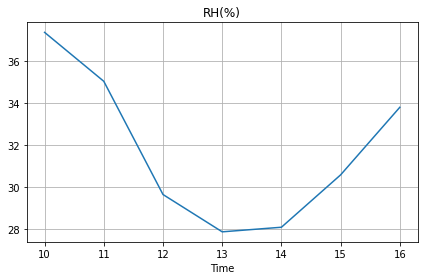

In [22]:
df.groupby([df["Time"].dt.hour])["RH(%)"].mean().plot(grid=True)
plt.title('RH(%)')

plt.tight_layout()


/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 9 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 9 missing from current font.
  font.set_text(s, 0, flags=flags)


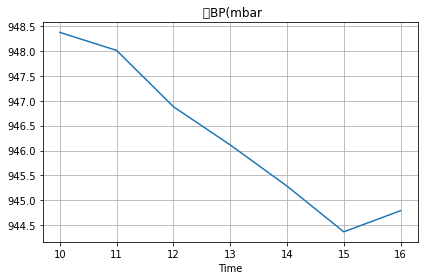

In [29]:
df.groupby([df["Time"].dt.hour])["BP(mbar)"].mean().plot(grid=True)
plt.title(' 	BP(mbar')

plt.tight_layout()


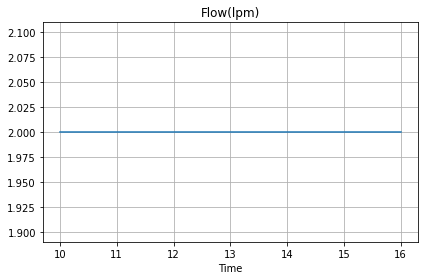

In [26]:
df.groupby([df["Time"].dt.hour])["Flow(lpm)"].mean().plot(grid=True)
plt.title('Flow(lpm)')

plt.tight_layout()
